In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import altair as alt

In [2]:
#Reading input files to python dataframe
df_train = pd.read_csv('C:/Users/sampr/Desktop/Data mining assignments/Cmpe 255 Project/ames_raw.csv', encoding='utf-8')
df_test = pd.read_csv('C:/Users/sampr/Desktop/Data mining assignments/Cmpe 255 Project/test.csv', encoding='utf-8')

In [4]:
#Initial preprocessing on input file
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]
df_train.columns = df_train.columns.str.replace(' ', '')
df_train.rename(columns={"Order": "Id","YearRemod/Add":"YearRemodAdd"},inplace='True')
print("Shape of train data :",df_train.shape)
print("Shape of test data :",df_test.shape)

Shape of train data : (2930, 82)
Shape of test data : (1459, 80)


In [5]:
#Incorporating crime data
year = {2006: '222.0', 
           2007: '265.7', 
           2008: '247.4', 
           2009: '219.6', 
           2010: '217.1'} 
df_train['Crime Rate'] = df_train['YrSold'].map(year)
df_test['Crime Rate'] = df_test['YrSold'].map(year)

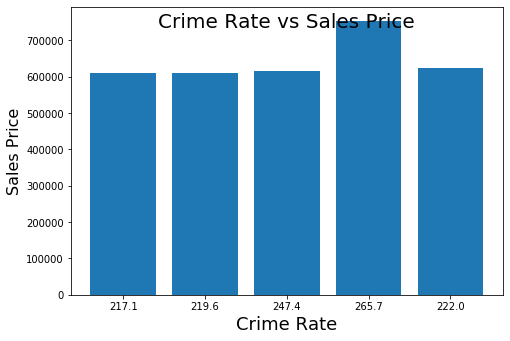

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_train['Crime Rate'],df_train['SalePrice'])
fig.suptitle('Crime Rate vs Sales Price', fontsize=20)
plt.xlabel('Crime Rate', fontsize=18)
plt.ylabel('Sales Price', fontsize=16)
plt.show()

In [7]:
df_train.shape

(2930, 83)

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MSSubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
LotFrontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
LotArea,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
OverallQual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
OverallCond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
YearBuilt,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
YearRemodAdd,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
MasVnrArea,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [9]:
df_train.dtypes

Id                 int64
PID                int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Crime Rate        object
Length: 83, dtype: object

Skewness of Data: 1.7435000757376466


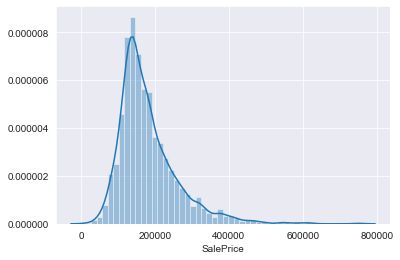

In [10]:
#Analyzing thw distribution of test variable  'SalePrice'
warnings.filterwarnings("ignore")
print("Skewness of Data:",format(df_train['SalePrice'].skew()))
sns.set_style('darkgrid')
sns.distplot(df_train['SalePrice'])